<a href="https://colab.research.google.com/github/MohitSolunke/Chatbot-With-LangGraph/blob/main/ChatbotwithLangraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chatbots with Langgraph

In [1]:
! pip install langgraph langsmith

In [2]:
! pip install langchain langchain_groq langchain_community

In [3]:
from google.colab import userdata
groq_api_key = userdata.get('GROQ_API_KEY')
langsmith = userdata.get('LANGSMITH_API_KEY')




In [4]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "CourseLanggraph"

In [5]:
from langchain_groq import ChatGroq

In [6]:
llm = ChatGroq(groq_api_key = groq_api_key, model_name = "Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7e641fdf9d20>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7e641fdfa9e0>, model_name='Gemma2-9b-It', groq_api_key=SecretStr('**********'))

## Start Building Chatbot using Langraph

In [7]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [8]:
class State(TypedDict):
  #Message have the type "list". The 'add_messages' Function
  # in the annotation defines how this state key should be updated
  # (in this case, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [9]:
graph_builder

In [10]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [11]:
graph_builder.add_node("chatbot", chatbot)

In [12]:
graph_builder

In [13]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [14]:
graph = graph_builder.compile()

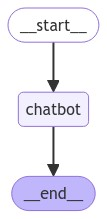

In [15]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [18]:
while True:
  user_input = input("User: ")
  if user_input.lower() in ["quit", "q"]:
    print("Good Bye ")
    break
  for event in graph.stream({"messages": ("user", user_input)}):
     print(event.values())
     for value in event.values():
       print(value["messages"])
       print("Assistant:", value["messages"].content)


User: Hello
dict_values([{'messages': AIMessage(content='Hello! 👋 \n\nHow can I help you today? 😊\n', response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 15, 'total_tokens': 31, 'completion_time': 0.03118128, 'prompt_time': 0.002335667, 'queue_time': None, 'total_time': 0.033516947}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-96e3bab0-15b7-4d69-8ac6-a4584dec8424-0', usage_metadata={'input_tokens': 15, 'output_tokens': 16, 'total_tokens': 31})}])
content='Hello! 👋 \n\nHow can I help you today? 😊\n' response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 15, 'total_tokens': 31, 'completion_time': 0.03118128, 'prompt_time': 0.002335667, 'queue_time': None, 'total_time': 0.033516947}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-96e3bab0-15b7-4d69-8ac6-a4584dec8424-0' usage_metadata={'input_tok